# PreProcessing Data

In [15]:
import numpy as np 
import matplotlib.pyplot as plt # to visualize only 
import pandas as pd
import gc

In [16]:
x = pd.read_csv("./data/train_x.csv", delimiter=",", header = None) # load from text 

In [17]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)

In [18]:
x = x.values
y = (y.values).ravel()

In [19]:
x = x.astype(np.float32)

#normalize (don't know if I should do this)
x /= 255

In [20]:
#splitting the data into random training and validation set, right now using 1/10 as validation (5000 instances)

from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(
    x, y, test_size=1/10.0, random_state=0)

In [8]:
#splitting the data into training and validation sets (might change later)

train_x = x[:25000, :]
train_y = y[:25000]
valid_x = x[25000:, :]
valid_y = y[25000:]

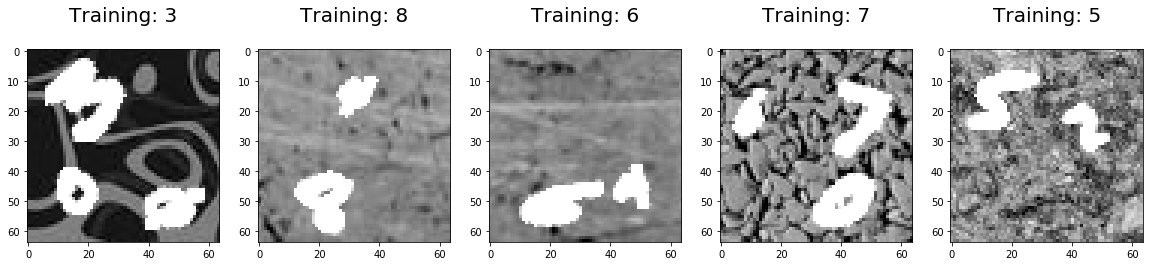

In [29]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(valid_x[0:5], valid_y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [23]:
del(x)
del(y)
gc.collect()

10862

# Logisitc Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [25]:
logisticRegr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
#predict on validation
predictions = logisticRegr.predict(valid_x)

In [30]:
score = logisticRegr.score(valid_x, valid_y)
print(score)

0.1404


In [31]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(valid_y, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

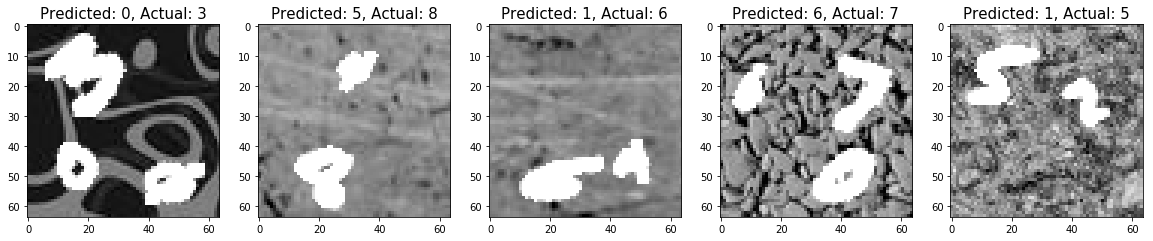

In [35]:
#visualizing misclassified instances

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(valid_x[badIndex], (64,64)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], valid_y[badIndex]), fontsize = 15)

### trying to get logistic to be a l